In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the MNIST handwritten dataset from keras
#split the loaded data into training data and testing data
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
#Two dimensional representation of handwritten number '5'( 0-black 255-white )
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
#scale the x_train and x_test data to get more accurate results
x_train = x_train/255
x_test = x_test/255

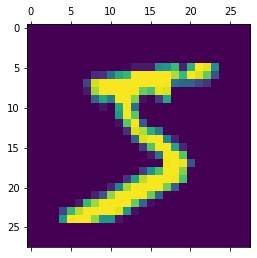

In [20]:
plt.matshow(x_train[0])

In [21]:
#Correct digit number corresponding to the above number in picture.
y_train[0]

5

In [22]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
x_train[0].shape

(28, 28)

In [24]:
x_train.shape

(60000, 28, 28)

In [27]:
#Flat the 28x28 matrix representation of number in picture.(2d array values to 1d array values) | training data
x_train_flattened = x_train.reshape(len(x_train), len(x_train[0])*len(x_train[0]))
x_train_flattened.shape

(60000, 784)

In [26]:
len(x_test[0])

28

In [28]:
#Flat the 28x28 2-D array format of data representing the handwritten digit in an image | Testing data 
x_test_flattened = x_test.reshape(len(x_test), len(x_test[0])*len(x_test[0]))
x_test_flattened.shape

(10000, 784)

In [29]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
#matshow function works only with 2D array format data.
plt.matshow(x_train_flattened[0])

ValueError: not enough values to unpack (expected 2, got 1)

In [30]:
#Create the simple neural network with two layers namely input layer and output layer
model = keras.Sequential(
    [keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")]
)
#compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

#Train the model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.7150 - accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3108 - accuracy: 0.9137
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2822 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2665 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2627 - accuracy: 0.9261


In [31]:
#Evaluate the model with test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 4s 7ms/step - loss: 0.2681 - accuracy: 0.9263


[0.26809629797935486, 0.9262999892234802]

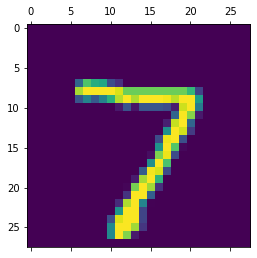

In [33]:
plt.matshow(x_test[0])

In [32]:
#Test the model with prediction
y_predicted_output = model.predict(x_test_flattened)
y_predicted_output[0]#It returns the accuracy value for all the 9 digits and among these we need to findout the value which has maximum value.

array([3.1447172e-02, 3.6611436e-07, 4.4000059e-02, 9.6203494e-01,
       2.3764074e-03, 1.2637502e-01, 1.8640935e-06, 9.9979579e-01,
       1.1742574e-01, 7.2311282e-01], dtype=float32)

In [34]:
#Inorder to find out the maximum value in the array
np.argmax(y_predicted_output[0])

7

In [39]:
#List out the predicted output labels and check with the actual y_test dataset
y_predicted_output_labels = [np.argmax(i) for i in y_predicted_output]
y_predicted_output_labels[0:5]

[7, 2, 1, 0, 4]

In [38]:
#check the y_predicted_output_labels with the actual y_test dataset.
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [40]:
#To get the detailed view of the neural network model we built, plot the confusion matrix
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_output_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    6,    5,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  915,   17,    8,    6,   13,   11,   41,    5],
       [   4,    0,   15,  909,    0,   36,    2,   10,   25,    9],
       [   1,    1,    2,    2,  917,    0,   12,    4,   10,   33],
       [   9,    2,    2,   21,    6,  803,   15,    4,   24,    6],
       [  12,    3,    5,    1,    7,   18,  908,    2,    2,    0],
       [   1,    5,   20,    7,    9,    2,    0,  942,    4,   38],
       [   6,    7,    5,   20,    9,   34,    8,    9,  868,    8],
       [  11,    7,    1,   11,   23,    8,    0,   13,    6,  929]])>

Text(33.0, 0.5, 'Truth')

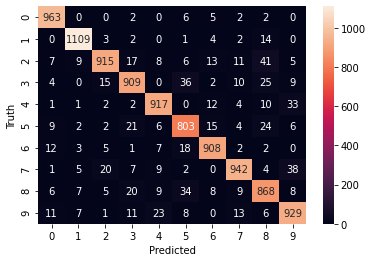

In [45]:
#Inorder to plot the confusion matrix with great visulization details you need to use 'heatmap()' method in 'seaborn' module.
import seaborn as sn
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
#Inorder to achieve more accurated model you need to build a neural network with hidden layer
model_with_hidden_layer = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation="relu"),#hidden layer
        keras.layers.Dense(10, input_shape=(100, ), activation="sigmoid"),#ouput layer
    ]
)
#compile the model``
model_with_hidden_layer.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
#fit (or) train the model
model_with_hidden_layer.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4725 - accuracy: 0.8658
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1397 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0884 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0526 - accuracy: 0.9844


In [64]:
#evaluate the newly created model having hidden layer
model_with_hidden_layer.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 4s 8ms/step - loss: 0.0902 - accuracy: 0.9706


[0.09022898972034454, 0.9706000089645386]

In [65]:
#predict the output based on the test data
y_predicted_output_for_model_with_hidden_layer = model_with_hidden_layer.predict(x_test_flattened)
y_predicted_output_for_model_with_hidden_layer[0]

array([4.3682218e-02, 1.3771653e-04, 2.2714520e-01, 9.3358028e-01,
       8.8221868e-06, 1.2637377e-02, 3.9174114e-07, 9.9999273e-01,
       1.7839727e-01, 3.1412274e-02], dtype=float32)

In [66]:
np.argmax(y_predicted_output_for_model_with_hidden_layer[0])

7

In [67]:
y_predicted_output_for_model_with_hidden_layer_labels = [np.argmax(i) for i in y_predicted_output_for_model_with_hidden_layer]
y_predicted_output_for_model_with_hidden_layer_labels[0:5]

[7, 2, 1, 0, 4]

In [68]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_predicted_output_for_model_with_hidden_layer_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    2,    1,    2,    1,    1,    1,    0],
       [   0, 1116,    3,    2,    0,    2,    2,    0,   10,    0],
       [   6,    2,  995,   10,    4,    0,    2,    6,    7,    0],
       [   0,    0,    0,  978,    0,   22,    0,    4,    4,    2],
       [   1,    0,    4,    0,  971,    0,    0,    2,    1,    3],
       [   2,    0,    0,    3,    1,  880,    3,    0,    2,    1],
       [   7,    2,    1,    1,    8,   22,  912,    0,    5,    0],
       [   1,    7,   10,   10,    2,    0,    0,  992,    3,    3],
       [   3,    0,    3,    6,    7,   11,    0,    2,  939,    3],
       [   0,    2,    0,   10,   18,   15,    1,    5,    5,  953]])>

Text(33.0, 0.5, 'truth')

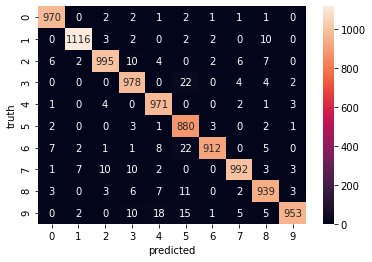

In [69]:
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [5]:
#Way to build a neural network without flatten the data externely
model3 = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),#input layer
        keras.layers.Dense(100, input_shape=(784,), activation="relu"), #hidden layer
        keras.layers.Dense(10, input_shape=(100,), activation="sigmoid") #output layer
    ]
)
#compile the model
model3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
#train the model with x_test
model3.fit(x_test, y_test, epochs=5)

313/313 [==============================] - 5s 7ms/step - loss: 20.5803 - accuracy: 0.6942
